In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
import codesModel as codeM


In [2]:
# Opciones de pandas
rows, cols = 50, 50
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
data = pd.read_csv('data_technical_clean.csv', header=[0,1], index_col=0)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m-%d'), inplace=True)
data

Attributes    Close                                       CloseNext           \
Symbol          BDX       GL       IBM       NSC      PEP       BDX       GL   
1985-03-29    3.109   2.7816   31.7500    7.1667    2.804     3.094   2.8295   
1985-04-01    3.094   2.8295   32.0313    7.2083    2.766     3.039   2.8775   
1985-04-02    3.039   2.8775   31.9375    7.2083    2.714     3.055   2.8615   
1985-04-03    3.055   2.8615   31.6250    7.2222    2.747     3.039   2.8615   
1985-04-04    3.039   2.8615   31.7500    7.1944    2.791     2.953   2.8615   
...             ...      ...       ...       ...      ...       ...      ...   
2020-12-22  245.900  91.7500  123.6100  230.5000  144.020   244.250  92.9000   
2020-12-23  244.250  92.9000  123.9000  233.1200  144.410   247.990  92.8700   
2020-12-24  247.990  92.8700  124.6900  234.3900  145.060   248.150  93.2900   
2020-12-28  248.150  93.2900  124.8200  236.7100  146.910   248.350  92.1600   
2020-12-29  248.350  92.1600  123.8000  233.9900  147.420   246.680  93.2100   

Attributes                                  Volume                      \
Symbol           IBM       NSC      PEP        BDX         GL      IBM   
1985-03-29   32.0313    7.2083    2.766   809600.0   290250.0  2780000   
1985-04-01   31.9375    7.2083    2.714  1664000.0   999000.0  3363200   
1985-04-02   31.6250    7.2222    2.747   444800.0  1108350.0  3796000   
1985-04-03   31.7500    7.1944    2.791   540800.0  3017250.0  3316000   
1985-04-04   30.9688    7.2361    2.747   217600.0  1020600.0  2147200   
...              ...       ...      ...        ...        ...      ...   
2020-12-22  123.9000  233.1200  144.410   941191.0   477805.0  4337757   
2020-12-23  124.6900  234.3900  145.060   919508.0   554256.0  2693889   
2020-12-24  124.8200  236.7100  146.910   439981.0    76085.0  1761122   
2020-12-28  123.8000  233.9900  147.420   644520.0   345523.0  3615222   
2020-12-29  124.3400  235.9800  147.310   817030.0   514751.0  3487007   

Attributes                              bop                                \
Symbol            NSC         PEP       BDX        GL       IBM       NSC   
1985-03-29   447300.0  13685400.0  1.000000  0.500000  0.083200  0.000000   
1985-04-01  1357200.0   7457400.0  0.000000  0.832985  0.818446 -0.143004   
1985-04-02  1437300.0   6652800.0 -0.900000  0.817975 -0.312600 -0.250000   
1985-04-03   377100.0   9399600.0 -0.114286  0.000000 -0.727167  0.222400   
1985-04-04   417600.0  10612800.0  0.000000  0.666667  0.285714  0.000000   
...               ...         ...       ...       ...       ...       ...   
2020-12-22   808781.0   2653806.0 -0.464615 -0.358209  0.165746  0.247492   
2020-12-23  1209222.0   2645127.0 -0.927869  0.519737  0.013605  0.324324   
2020-12-24   383082.0    883285.0  0.710345 -0.255952 -0.348315  0.354009   
2020-12-28   785210.0   2493497.0 -0.252427 -0.086705 -0.130841  0.149390   
2020-12-29   929851.0   3186688.0 -0.305476 -0.923077 -0.691964 -0.496622   

Attributes                ema200                                     \
Symbol           PEP         BDX         GL         IBM         NSC   
1985-03-29  0.157895    2.979521   2.789597   33.669291    7.281779   
1985-04-01 -0.745098    2.980660   2.789994   33.652992    7.281048   
1985-04-02 -0.675325    2.981240   2.790865   33.635923    7.280324   
1985-04-03  0.775862    2.981974   2.791568   33.615913    7.279746   
1985-04-04  0.333333    2.982542   2.792263   33.597347    7.278896   
...              ...         ...        ...         ...         ...   
2020-12-22 -0.380328  244.242965  85.685624  123.592372  206.625004   
2020-12-23 -0.052425  244.243035  85.757409  123.595433  206.888635   
2020-12-24  0.237113  244.280318  85.828181  123.606324  207.162281   
2020-12-28  0.550485  244.318822  85.902428  123.618400  207.456288   
2020-12-29 -0.134715  244.358934  85.964692  123.620207  207.720305   

Attributes                  macd                                      

In [3]:
#Cuál es el número de registros?
#Cuál es el número de atributos?
shape = data.shape
shape

(9012, 45)

## 1) Modelo donde escalamos solo las variables independientes

In [4]:
X = data.drop(['CloseNext'], level=0, axis=1)
y = data['CloseNext']

In [5]:
def dfM(stockName, X):
    scaler = StandardScaler()
    Xsc = scaler.fit_transform(X.xs(stockName, level=1, axis=1))
    df = pd.DataFrame(data = Xsc, columns = X.xs(stockName, level=1, axis=1).columns, index=X.xs(stockName, level=1, axis=1).index)
    df['CloseNext'] = y[stockName].values
    return df

In [6]:
stock_sel = ['BDX','GL','IBM','NSC','PEP']
data_scaler = pd.DataFrame()
for stock in stock_sel:
    print(stock)
    df2 = dfM(stock, X) 
    df2.columns = pd.MultiIndex.from_product([df2.columns, [stock]], names=['Attributes', 'Symbol'])
    data_scaler = pd.concat([data_scaler, df2], axis=1).sort_index(axis=1)

data_scaler

BDX
GL
IBM
NSC
PEP


Attributes     Close                                         CloseNext  \
Symbol           BDX        GL       IBM       NSC       PEP       BDX   
1985-03-29 -0.911156 -0.950869 -1.038759 -0.906118 -1.331440     3.094   
1985-04-01 -0.911368 -0.948980 -1.033779 -0.905265 -1.332476     3.039   
1985-04-02 -0.912145 -0.947087 -1.035440 -0.905265 -1.333893     3.055   
1985-04-03 -0.911919 -0.947718 -1.040972 -0.904980 -1.332994     3.039   
1985-04-04 -0.912145 -0.947718 -1.038759 -0.905550 -1.331795     2.953   
...              ...       ...       ...       ...       ...       ...   
2020-12-22  2.520613  2.557088  0.587381  3.674760  2.516461   244.250   
2020-12-23  2.497291  2.602431  0.592515  3.728500  2.527088   247.990   
2020-12-24  2.550154  2.601249  0.606500  3.754550  2.544800   248.150   
2020-12-28  2.552416  2.617809  0.608801  3.802136  2.595209   248.350   
2020-12-29  2.555243  2.573254  0.590745  3.746345  2.609106   246.680   

Attributes                                          Volume            \
Symbol           GL       IBM       NSC      PEP       BDX        GL   
1985-03-29   2.8295   32.0313    7.2083    2.766 -0.399336 -0.704544   
1985-04-01   2.8775   31.9375    7.2083    2.714  0.772782  0.139929   
1985-04-02   2.8615   31.6250    7.2222    2.747 -0.899791  0.270219   
1985-04-03   2.8615   31.7500    7.1944    2.791 -0.768093  2.544667   
1985-04-04   2.8615   30.9688    7.2361    2.747 -1.211478  0.165665   
...             ...       ...       ...      ...       ...       ...   
2020-12-22  92.9000  123.9000  233.1200  144.410 -0.218812 -0.481073   
2020-12-23  92.8700  124.6900  234.3900  145.060 -0.248558 -0.389982   
2020-12-24  93.2900  124.8200  236.7100  146.910 -0.906402 -0.959721   
2020-12-28  92.1600  123.8000  233.9900  147.420 -0.625803 -0.638687   
2020-12-29  93.2100  124.3400  235.9800  147.310 -0.389143 -0.437052   

Attributes                                     bop                      \
Symbol           IBM       NSC       PEP       BDX        GL       IBM   
1985-03-29 -0.985542 -0.863472  3.477671  1.754512  0.861471  0.124380   
1985-04-01 -0.852195 -0.201670  1.072604 -0.036179  1.463064  1.484752   
1985-04-02 -0.753237 -0.143410  0.761892 -1.647801  1.435945 -0.607939   
1985-04-03 -0.862988 -0.914531  1.822624 -0.240830 -0.041862 -1.374982   
1985-04-04 -1.130230 -0.885074  2.291125 -0.036179  1.162582  0.499077   
...              ...       ...       ...       ...       ...       ...   
2020-12-22 -0.629366 -0.600554 -0.782400 -0.868162 -0.689026  0.277109   
2020-12-23 -1.005231 -0.309299 -0.785752 -1.697706  0.897128 -0.004385   
2020-12-24 -1.218505 -0.910180 -1.466122  1.235829 -0.504283 -0.674019   
2020-12-28 -0.794572 -0.617698 -0.844307 -0.488198 -0.198510 -0.271644   
2020-12-29 -0.823887 -0.512496 -0.576617 -0.583191 -1.709554 -1.309849   

Attributes                        ema200                                \
Symbol           NSC       PEP       BDX        GL       IBM       NSC   
1985-03-29 -0.037051  0.209889 -0.908093 -0.947346 -0.997132 -0.920811   
1985-04-01 -0.300537 -1.524297 -0.908077 -0.947329 -0.997423 -0.920827   
1985-04-02 -0.497678 -1.390298 -0.908068 -0.947294 -0.997729 -0.920843   
1985-04-03  0.372723  1.396687 -0.908057 -0.947265 -0.998086 -0.920856   
1985-04-04 -0.037051  0.546817 -0.908049 -0.947237 -0.998418 -0.920875   
...              ...       ...       ...       ...       ...       ...   
2020-12-22  0.418954 -0.823761  2.629780  2.439151  0.610730  3.465452   
2020-12-23  0.560519 -0.194027  2.629781  2.442084  0.610785  3.471253   
2020-12-24  0.615213  0.362028  2.630328  2.444975  0.610980  3.477274   
2020-12-28  0.238202  0.963854  2.630892  2.448008  0.611196  3.483743   
2020-12-29 -0.952081 -0.352064  2.631480  2.450552  0.611228  3.489553   

Attributes                macd                                          \
Symbol           PEP       BDX        GL       IBM       NSC       PEP   
1985-03-29 -1.334870 -0.12

## Trabajo con la accion NSC usando standarizacion

In [7]:
dataNSC_scaler = data_scaler.xs('NSC', level=1, axis=1)
dataNSC_scaler

Attributes,Close,CloseNext,Volume,bop,ema200,macd,momentum,signal,std20d
1985-03-29,-0.906118,7.2083,-0.863472,-0.037051,-0.920811,-0.162552,0.002011,-0.173927,-0.725268
1985-04-01,-0.905265,7.2083,-0.201670,-0.300537,-0.920827,-0.155078,0.012574,-0.172194,-0.726060
1985-04-02,-0.905265,7.2222,-0.143410,-0.497678,-0.920843,-0.148878,-0.019267,-0.169485,-0.726194
1985-04-03,-0.904980,7.1944,-0.914531,0.372723,-0.920856,-0.142958,-0.008628,-0.166055,-0.727239
1985-04-04,-0.905550,7.2361,-0.885074,-0.037051,-0.920875,-0.139689,-0.040545,-0.162613,-0.737681
...,...,...,...,...,...,...,...,...,...
2020-12-22,3.674760,233.1200,-0.600554,0.418954,3.465452,-0.417610,0.256280,0.670425,1.833114
2020-12-23,3.728500,234.3900,-0.309299,0.560519,3.471253,-0.378708,1.986106,0.455580,1.719748
2020-12-24,3.754550,236.7100,-0.910180,0.615213,3.477274,-0.273381,0.952803,0.306173,1.607404
2020-12-28,3.802136,233.9900,-0.617698,0.238202,3.483743,-0.057721,1.756483,0.232656,1.419798


## 2) Modelo donde escalamos las variables independientes y la dependiente

## gridsearch

In [21]:
parameter_space = {
    'n_estimators': [100, 150, 200],
    'min_samples_leaf': [supuestamente el mejor rango es entre 1- 20],
    'max_features': ['auto', 0.5, 'log2', 'sqrt'],
    'oob_score': [True, False],
    'max_depth' :[None, 7],
}

SyntaxError: invalid syntax (<ipython-input-21-9731b00d498c>, line 3)

In [22]:
mean = 0
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
for stock in stocks:
    stock = data.xs(stock, level=1, axis=1)
    sc_predict = StandardScaler()
    #stock=dataNSC_scaler
    y_data = sc_predict.fit_transform(stock.values[:, stock.columns.get_loc('CloseNext'):stock.columns.get_loc('CloseNext')+1])    
    model = RandomForestRegressor(bootstrap=True, n_jobs=-1)
    parameter_space = {
        'n_estimators': [500, 700, 1000],
        'min_samples_leaf': [2,3],
        'max_features': [0.7,0.5],
        'oob_score': [True, False],
        'max_depth' :[None, 10,15]
    }
    i=0.3
    codeM.gridSearch(model,stock, parameter_space,0.3,8,i)
mean = mean/5
print(mean)

{'max_depth': 10, 'max_features': 0.7, 'min_samples_leaf': 3, 'n_estimators': 700, 'oob_score': False}
1.3439005163133673
{'max_depth': 10, 'max_features': 0.7, 'min_samples_leaf': 2, 'n_estimators': 700, 'oob_score': True}
0.5976239757695716
{'max_depth': 10, 'max_features': 0.7, 'min_samples_leaf': 2, 'n_estimators': 700, 'oob_score': False}
0.8066418538783433
{'max_depth': 10, 'max_features': 0.7, 'min_samples_leaf': 3, 'n_estimators': 1000, 'oob_score': False}
1.4743040516234545
{'max_depth': 10, 'max_features': 0.7, 'min_samples_leaf': 3, 'n_estimators': 500, 'oob_score': False}
1.6445245313165202
0.0


In [30]:
mean = 0
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']    
i=0.3
Params2 = {'max_features': 0.7, 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 1000, 'oob_score': True}
model2 = RandomForestRegressor(max_features= Params2['max_features'], max_depth= Params2['max_depth'],  
                              min_samples_leaf= Params2['min_samples_leaf'], n_estimators=Params2['n_estimators'], 
                              oob_score= Params2['oob_score'], criterion="mae")
codeM.all_grid_search(model2, data_scaler, stocks)


[1.361570477634224, 0.5915094039368161, 0.8941170448452264, 1.5154157760867348, 1.7160729540199167]
RMSE mean: 1.2157371313045835 
 MAPE mean: 0.01231463826628032 
 MAE mean: 0.6513003607877215 




In [11]:
Params2 = {'min_samples_leaf': 2, 'oob_score': True, 'criterion':"mae"}
model = RandomForestRegressor(max_features= Params2['max_features'], max_depth= Params2['max_depth'],  
                              min_samples_leaf= Params2['min_samples_leaf'], n_estimators=Params2['n_estimators'], 
                              oob_score= Params2['oob_score'], criterion= Params2['criterion'])


KeyError: 'max_features'

In [13]:
Params = {'max_features': 0.5, 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200, 'oob_score': True}
model = RandomForestRegressor(max_features= Params['max_features'], max_depth= Params['max_depth'],  min_samples_leaf= Params['min_samples_leaf'], n_estimators=Params['n_estimators'], oob_score= Params['oob_score'])


## Todas las stocks

'NSC'

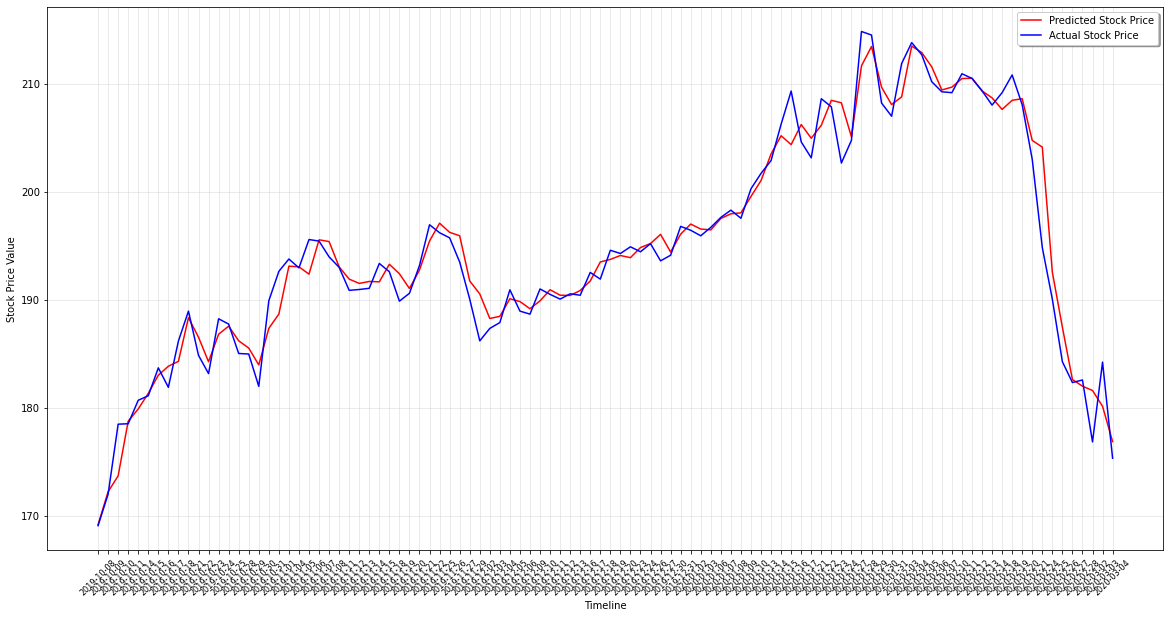

Train mae: 0.25570318468611286
Train rmse: 0.47962919357590644
mae: 0.7290082085798821
rmse: 1.4174228226116807
mape: 0.0146920334199911


'GL'

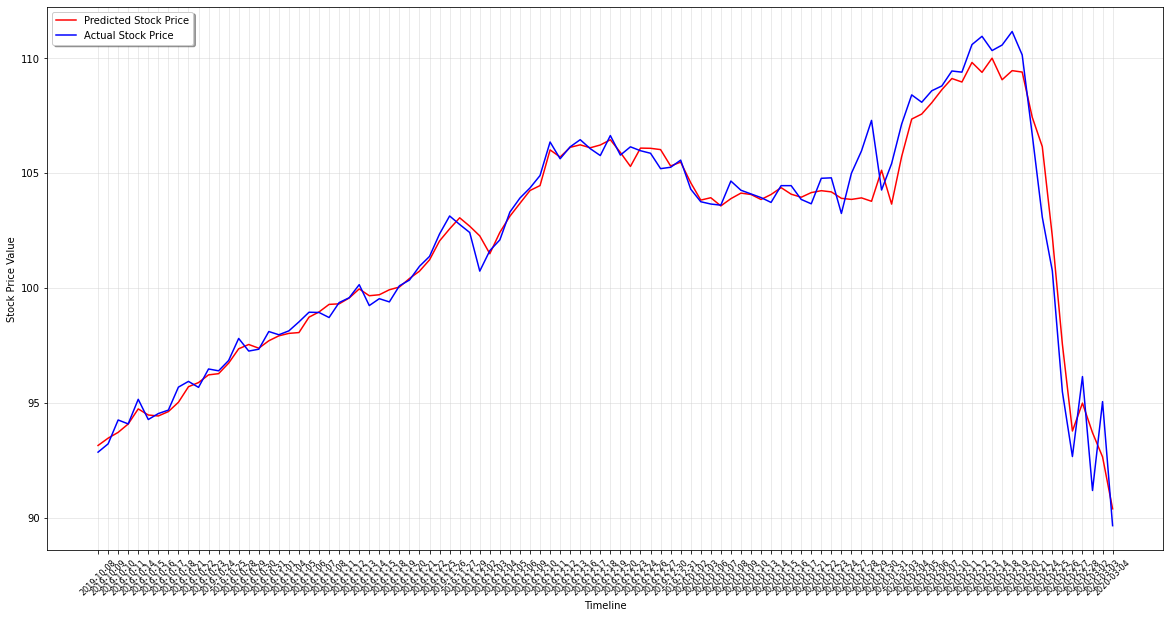

Train mae: 0.10734194221623354
Train rmse: 0.22081222865883998
mae: 0.3006156971153846
rmse: 0.5958561051060542
mape: 0.012326792973162241


'PEP'

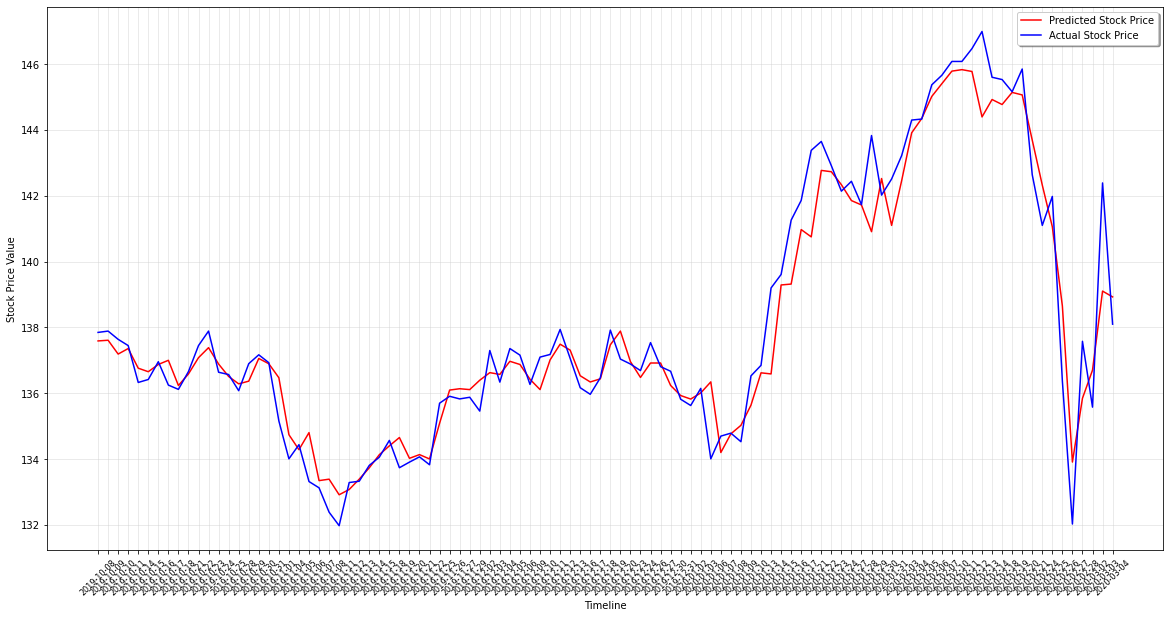

Train mae: 0.17828025523145336
Train rmse: 0.30344560473274135
mae: 0.48951401997041427
rmse: 0.9193335116640855
mape: 0.0114086295819977


'BDX'

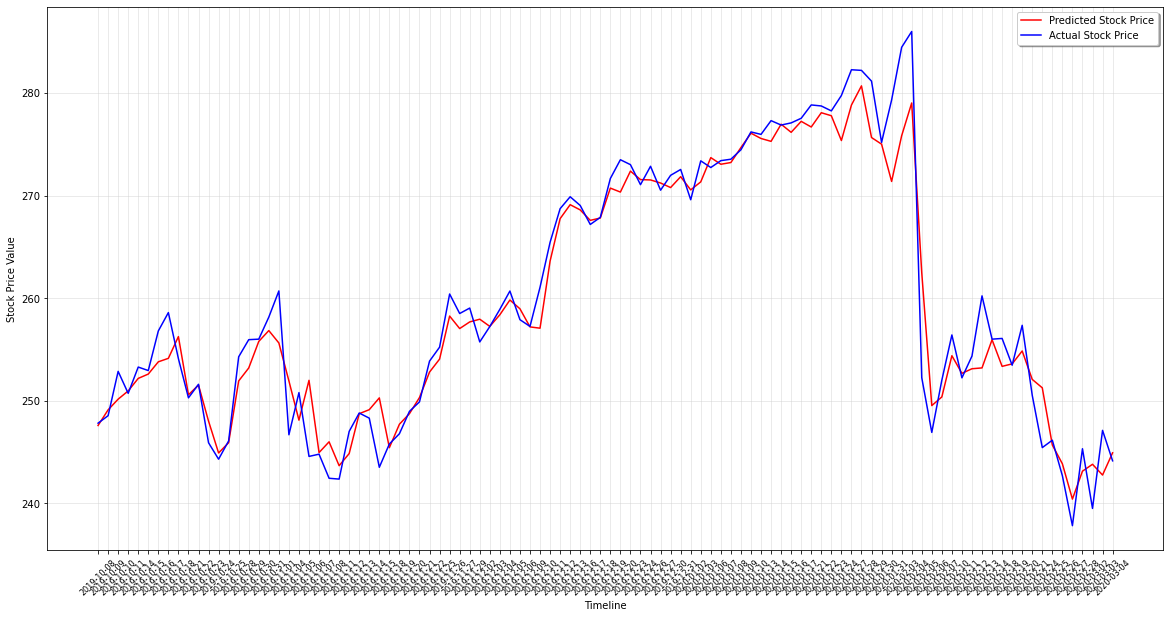

Train mae: 0.2730071940393162
Train rmse: 0.5674566402163597
mae: 0.714288130547337
rmse: 1.5436579200200635
mape: 0.01142855848524598


'IBM'

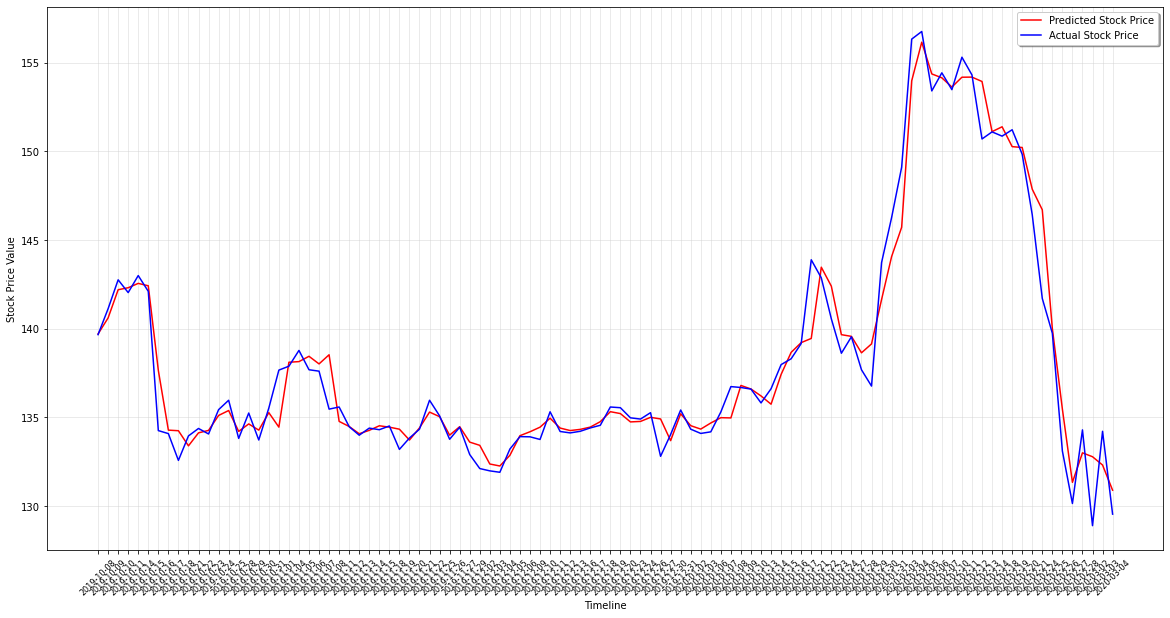

Train mae: 0.3861922436588472
Train rmse: 0.6216418397065577
mae: 1.083447737241122
rmse: 1.752890658853163
mape: 0.012544497139101711
mean Rmse: 1.2458322036510094
mean Mae: 0.663374758690828


In [14]:
codeM.allStock(data, model, 8, isScaled=True)